In [1]:
#Data wrangling
import pandas as pd
import numpy as np
#Dataviz
import seaborn as sns 
import matplotlib.pyplot as plt 
#Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
#misc
import itertools
import functools
import os
#
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [4]:
df_Train = pd.read_csv('I-57-clean-final.csv')
df_Test = pd.read_csv('I-57-clean-test.csv')

### Python TS-Guide  
- https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

### Part 1 
- Use Arima(p,d,q) model to forecast. Find the model returned by R auto.arima(). Change the values of p and q and determine the best model using AICc and BIC. Do AICc and BIC select the same model as the best model?

In [16]:
TS_train = df_Train.query('Location_id == \"I80E_EXIT1\" and Direction == \"N\"')
TS_train.head()

,Time,Direction,Location_id,Count,Hour,Day
736,2013-06-16 01:00:00,N,I80E_EXIT1,375,1,2013-06-16
737,2013-06-16 02:00:00,N,I80E_EXIT1,244,2,2013-06-16
738,2013-06-16 03:00:00,N,I80E_EXIT1,152,3,2013-06-16
739,2013-06-16 04:00:00,N,I80E_EXIT1,115,4,2013-06-16
740,2013-06-16 05:00:00,N,I80E_EXIT1,126,5,2013-06-16


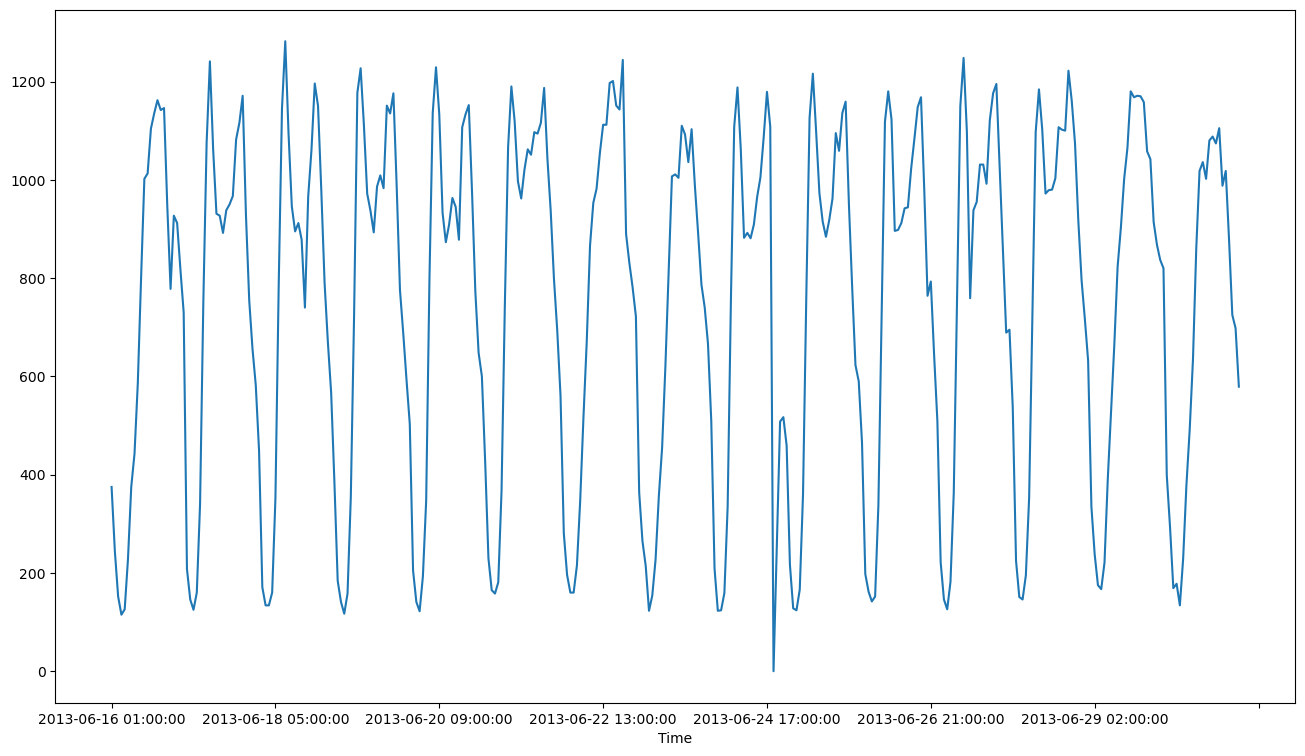

In [21]:
TS_train.set_index('Time').Count.plot(figsize=(16,9))
plt.show()

In [23]:
import statsmodels.api as sm

model = sm.tsa.arima.ARIMA(TS_train.set_index('Time').Count)
result = model.fit()

D:\Anaconda3\envs\msca\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda3\envs\msca\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda3\envs\msca\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [25]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Count   No. Observations:                  345
Model:                          ARIMA   Log Likelihood               -2519.840
Date:                Tue, 26 Apr 2022   AIC                           5043.680
Time:                        01:46:25   BIC                           5051.367
Sample:                             0   HQIC                          5046.741
                                - 345                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        757.4174     23.987     31.576      0.000     710.403     804.432
sigma2      1.293e+05   1.83e+04      7.060      0.000    9.34e+04    1.65e+05
Ljung-Box (L1) (Q):                 277.68   Jarque-

In [28]:
#Testing AutoARIMA
from pmdarima.arima import ADFTest
from pmdarima.arima import auto_arima

In [29]:
arima_modle = auto_arima(TS_train.set_index('Time').Count)

In [31]:
print(arima_modle.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  345
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -2153.790
Date:                Tue, 26 Apr 2022   AIC                           4319.580
Time:                        01:52:22   BIC                           4342.641
Sample:                             0   HQIC                          4328.764
                                - 345                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     67.0191      8.633      7.763      0.000      50.098      83.940
ar.L1          1.7922      0.033     53.885      0.000       1.727       1.857
ar.L2         -0.8810      0.032    -27.828      0.0

In [32]:
#Tuning p,q and use AIC/BIC as metrics

### Part 2 
- Use day of the week seasonal ARIMA(p,d,q)(P,D,Q)s model to forecast for July 1 (which is a Monday) 
- note use the hourly data



### Part 3 
- Use hour of the day seasonal ARIMA (p,d,q)(P,D,Q)s model to forecast for the hours 8:00, 9:00, 17:00 and 18:00 on July 1



### Part 4 
- For the July 1 8:00, 9:00, 17:00 and 18:00 forecasts, which model is better (part 2 or part 3) ?